Загружено событий: 100
Первые строки датафрейма:
             timestamp                                          signature
0  2023-08-21T08:00:00  MALWARE-CNC Win.Trojan.Jadtre variant outbound...
1  2023-08-21T09:00:00  EXPLOIT Remote Windows Win32k elevation of pri...
2  2023-08-21T10:00:00            EXPLOIT Java JRE to Oracle WebLogic RCE
3  2023-08-21T11:00:00          NETBIOS DCERPC NCACN-IP-TCP interfaces BO
4  2023-08-21T12:00:00  MALWARE-CNC User-Agent known malicious connect...
Распределение событий по типам (signature):
signature
MALWARE-CNC Win.Trojan.Jadtre variant outbound connection       12
EXPLOIT Remote Windows Win32k elevation of privilege attempt    11
EXPLOIT Java JRE to Oracle WebLogic RCE                         11
NETBIOS DCERPC NCACN-IP-TCP interfaces BO                       11
MALWARE-CNC User-Agent known malicious connecting IP            11
INDICATOR-COMPROMISE Suspicious inbound to mySQL port 3306      11
EXPLOIT Multiple IIS 6.0 attempt                   

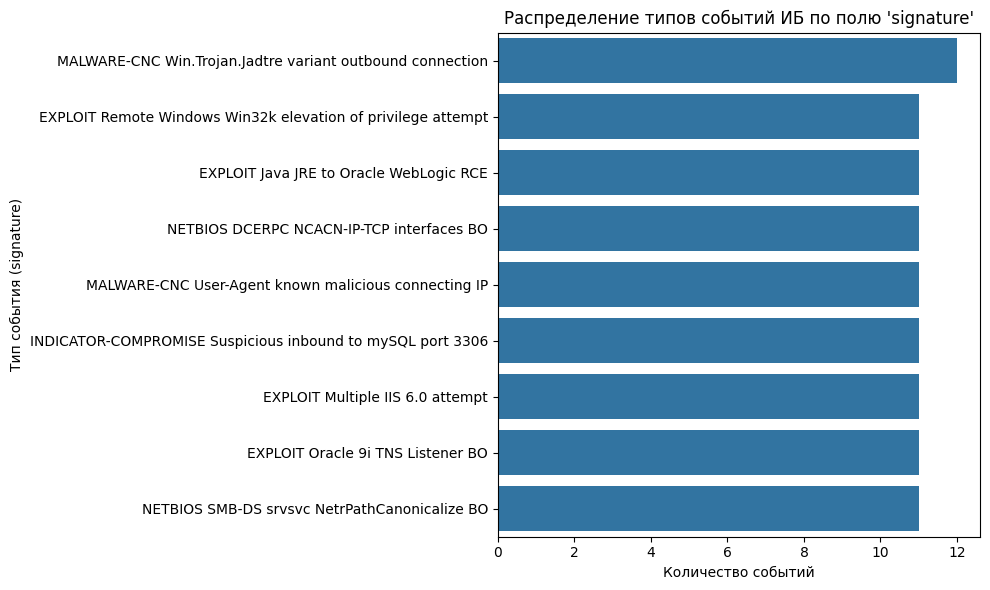

График сохранён в файл: signature_distribution.png


In [ ]:
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_events(json_path: str = "events.json") -> pd.DataFrame:
    """
    Загружает события ИБ из JSON-файла в датафрейм Pandas.

    Ожидается, что файл содержит либо:
    - список JSON-объектов,
    - либо JSON-объекты построчно (lines=True).

    :param json_path: путь к файлу events.json
    :return: DataFrame с событиями
    """
    path = Path(json_path)
    if not path.exists():
        raise FileNotFoundError(
            f"Файл {json_path} не найден. Положите events.json рядом со скриптом."
        )

    try:
        # пробуем прочитать как обычный JSON (список объектов)
        df = pd.read_json(path)
    except ValueError:
        # если формат не подошёл, пробуем построчный JSON (каждая строка — объект)
        df = pd.read_json(path, lines=True)

    return df


def analyze_signature_distribution(df: pd.DataFrame) -> pd.Series:
    """
    Считает распределение событий по полю 'signature'.

    :param df: DataFrame с событиями
    :return: Series с количеством событий по каждому типу signature
    """
    if "signature" not in df.columns:
        raise KeyError(
            "В данных нет столбца 'signature'. Проверьте структуру events.json."
        )

    counts = df["signature"].value_counts().sort_values(ascending=False)

    print("Распределение событий по типам (signature):")
    print(counts)

    return counts


def plot_signature_distribution(
    counts: pd.Series,
    top_n: int | None = None,
    save_path: str = "signature_distribution.png",
) -> None:
    """
    Строит график распределения типов событий ИБ по полю signature.

    :param counts: Series с количеством событий по каждому типу
    :param top_n: если задано — показывать только top_n самых частых типов
    :param save_path: путь для сохранения графика в PNG
    """
    if top_n is not None:
        counts = counts.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.values, y=counts.index)
    plt.xlabel("Количество событий")
    plt.ylabel("Тип события (signature)")
    plt.title("Распределение типов событий ИБ по полю 'signature'")
    plt.tight_layout()
    plt.savefig(save_path, dpi=150)
    plt.show()

    print(f"График сохранён в файл: {save_path}")


def main() -> None:
    """
    Точка входа: загружает данные, анализирует и строит график.
    """
    df = load_events("events.json")
    print(f"Загружено событий: {len(df)}")

    # Flatten the 'events' column to extract nested dictionaries into proper columns
    df = pd.DataFrame(df['events'].tolist())

    print("Первые строки датафрейма:")
    print(df.head())

    counts = analyze_signature_distribution(df)
    # Можно показать все типы или, например, только top-10
    plot_signature_distribution(counts, top_n=10)


if __name__ == "__main__":
    main()


# Новый раздел